## Observations and Insights 

1.There is a positive correlation between the mouse weight and the size of the tumor. Weight and the tumor size increases in a linear pattern.
2.From the summary statistics and charts Capomulin and Ramicane are the two drugs that shows a significant performance improvement among the 14 drugs administered.
3.Ketapril is the least performing drug.
4.The distribution of gender of mouse used in this clinical trial is almost equal in size.

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df= pd.merge(mouse_metadata, study_results, on=['Mouse ID'] )

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
# Checking the number of mice.

combined_data_df["Mouse ID"].count()


1893

In [95]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
dup_df=pd.DataFrame(combined_data_df, columns=["Mouse ID", "Timepoint"])
duplicates=dup_df.loc[dup_df.duplicated(keep='last')]
duplicates


,Mouse ID,Timepoint
908,g989,0
910,g989,5
912,g989,10
914,g989,15
916,g989,20


In [96]:
# Optional: Get all the data for the duplicate mouse ID. 
dupall_df=combined_data_df.copy()
duplicates_all=dupall_df.loc[dup_df.duplicated(keep='last')]
duplicates_all


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=dupall_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')
clean_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [98]:
# Checking the number of mice and the list of non deleted rows in the clean DataFrame.
print("Count of Mouse Ids :", clean_data["Mouse ID"].count())
dup_of_deleted=clean_data.loc[clean_data["Mouse ID"]=='g989'].reset_index()
print(dup_of_deleted[["Mouse ID", "Drug Regimen",  "Timepoint"]])

Count of Mouse Ids : 1888
  Mouse ID Drug Regimen  Timepoint
0     g989     Propriva          0
1     g989     Propriva          5
2     g989     Propriva         10
3     g989     Propriva         15
4     g989     Propriva         20
5     g989     Propriva         25
6     g989     Propriva         30
7     g989     Propriva         35


## Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# drug_df=pd.DataFrame(clean_data, columns=["Drug Regimen", "Tumor Volume (mm3)"])
# drug_df=drug_df.rename(columns={"Tumor Volume (mm3)" : "Tumor_vol"})
drug_df=pd.DataFrame(clean_data, columns=["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])
drug_df=drug_df.rename(columns={"Mouse ID" : "mouse_id", "Tumor Volume (mm3)" : "Tumor_vol"})
#print(drug_df)
mean_ps=drug_df.groupby("Drug Regimen").mean()
median_ps=drug_df.groupby("Drug Regimen").median()
var_ps=drug_df.groupby("Drug Regimen").var()
std_ps=drug_df.groupby("Drug Regimen").std()
sem_ps=drug_df.groupby("Drug Regimen").sem()

merge1=pd.merge(mean_ps, median_ps, on=['Drug Regimen'])
merge1=merge1.rename(columns={"Tumor_vol_x" : "Mean",
                              "Tumor_vol_y" : "Median"})
merge2=pd.merge(merge1, var_ps, on=['Drug Regimen'])

merge2=merge2.rename(columns={"Tumor_vol" : "Variance" })
merge3=pd.merge(merge2, std_ps, on=['Drug Regimen'])
merge3=merge3.rename(columns={"Tumor_vol" : "STD" })

summary_df=pd.merge(merge3, sem_ps, on=['Drug Regimen'])
summary_df=summary_df.rename(columns={"Tumor_vol" : "SEM"})
print(summary_df)


                   Mean     Median   Variance       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_df.groupby('Drug Regimen').Tumor_vol.agg(['mean', 'median','var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

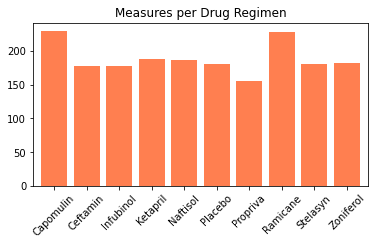

In [119]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measures_df=drug_df.groupby('Drug Regimen').Tumor_vol.agg(['count']).reset_index()
p_plot = measures_df.plot(kind="bar",title='Measures per Drug Regimen', figsize=(6,3), color='coral', width=0.8, legend=False )
# PandasPlot.set_xticklabels() can be used to set the tick labels as well
p_plot.set_xticklabels(measures_df['Drug Regimen'], rotation=45)
plt.show()

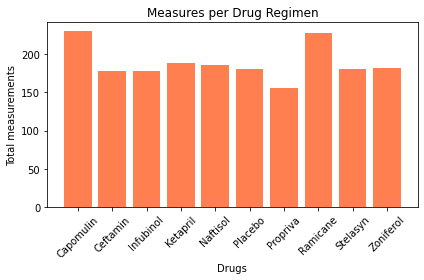

In [102]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measures_df=drug_df.groupby('Drug Regimen').Tumor_vol.agg(['count']).reset_index()
x_axis=measures_df["Drug Regimen"]
y_axis=measures_df["count"]
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, color='coral')
plt.title("Measures per Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Total measurements")
plt.xticks(tick_locations, measures_df['Drug Regimen'], rotation=45)
plt.tight_layout()
plt.show()


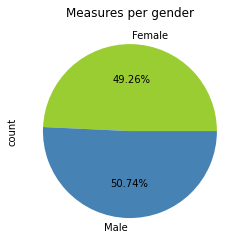

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=clean_data.groupby('Sex').Sex.agg(['count']).reset_index()
colors=['yellowgreen', 'steelblue']
gender_df.plot(kind='pie', y='count', title='Measures per gender', autopct='%1.2f%%', labels=gender_df['Sex'], colors= colors, legend=False)
plt.show()


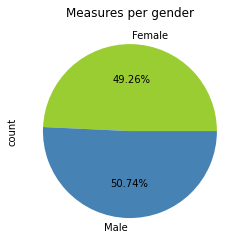

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors=['yellowgreen', 'steelblue']
plabels=['Female', 'Male']
plt.pie(gender_df['count'], colors=colors, labels=plabels, autopct='%1.2f%%')
plt.ylabel('count')
plt.title('Measures per gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ndrug_df=pd.DataFrame(clean_data, columns=["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]) 
#Get only the values for drug regimen from the drug_list 
reduced_df=ndrug_df.loc[ndrug_df["Drug Regimen"].isin(drug_list)]
# Start by getting the last (greatest) timepoint for each mouse
#reduced_df= reduced_df.groupby("Drug Regimen")["Timepoint"]
max_timepoint=reduced_df.groupby(['Mouse ID', 'Drug Regimen'])["Timepoint"].max().reset_index()
#Column values for all columns
max_timepoint.columns=['Mouse ID', 'Drug Regimen', 'Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged=pd.merge(max_timepoint, ndrug_df, how='left' , on=['Mouse ID', 'Timepoint'])
#Drop duplicate column
merged.drop(["Drug Regimen_y"], axis=1, inplace=True)
#Transpose the merged data so that the columns can be looped through
final_df=merged.pivot(index="Mouse ID", columns="Drug Regimen_x", values='Tumor Volume (mm3)')
print(final_df)


Drug Regimen_x  Capomulin   Ceftamin  Infubinol   Ramicane
Mouse ID                                                  
a203                  NaN        NaN  67.973419        NaN
a251                  NaN        NaN  65.525743        NaN
a275                  NaN  62.999356        NaN        NaN
a411                  NaN        NaN        NaN  38.407618
a444                  NaN        NaN        NaN  43.047543
...                   ...        ...        ...        ...
y769                  NaN  68.594745        NaN        NaN
y793            31.896238        NaN        NaN        NaN
y865                  NaN  64.729837        NaN        NaN
z578                  NaN        NaN        NaN  30.638696
z581                  NaN        NaN  62.754451        NaN

[100 rows x 4 columns]


In [106]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    quartiles=final_df[drug].quantile([.25,.50, .75])
    iqr=quartiles[0.75]-quartiles[0.25]
    lowerbound=quartiles[0.25] - (1.5*iqr)
    upperbound=quartiles[0.75] + (1.5*iqr)
    print(f'Potential outliers for drug :{drug} could be values below {lowerbound} and values above {upperbound}')                                    
    #Check for outliers and print
    outliers=final_df[(final_df[drug] < lowerbound) |  (final_df[drug] > upperbound)]
    if outliers.empty: print(f'No outliers found for drug :{drug}') 
    else: print(f'{len(outliers)} outlier(s) found for drug : {drug}')

Potential outliers for drug :Capomulin could be values below 20.70456164999999 and values above 51.83201549
No outliers found for drug :Capomulin
Potential outliers for drug :Ramicane could be values below 17.912664470000003 and values above 54.30681135
No outliers found for drug :Ramicane
Potential outliers for drug :Infubinol could be values below 36.83290494999999 and values above 82.74144559000001
1 outlier(s) found for drug : Infubinol
Potential outliers for drug :Ceftamin could be values below 25.355449580000002 and values above 87.66645829999999
No outliers found for drug :Ceftamin


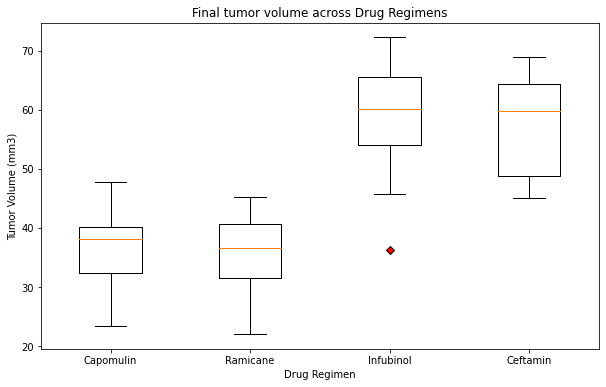

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plotlist=[]
fig, ax=plt.subplots(figsize= (10, 6))
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Final tumor volume across Drug Regimens")
red_marker = dict(markerfacecolor='r', marker='D')
#run thru the drug list to get the tumor volumes for the 4 drug regimens from final_df
plotlist=[list(final_df[drug].dropna()) for drug in drug_list]
ax.boxplot(plotlist,flierprops=red_marker)
plt.xticks([1,2,3,4], drug_list)
plt.show()

## Line and Scatter Plots

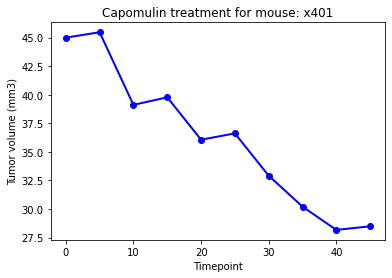

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401=clean_data.loc[clean_data['Mouse ID'] == 'x401', :]
x_axis=x401["Timepoint"]
y_axis=x401["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, linewidth=2, color='blue', marker='o')
plt.title("Capomulin treatment for mouse: x401")
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume (mm3)")
plt.show()

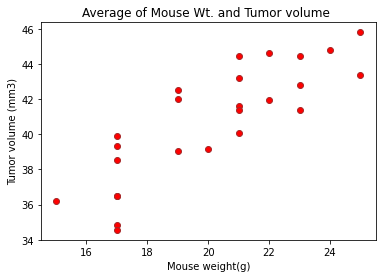

In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df=clean_data.loc[clean_data["Drug Regimen"]=='Capomulin']
avg_mouse_df=cap_df.groupby(["Mouse ID"]).mean() 
plt.scatter(avg_mouse_df["Weight (g)"], avg_mouse_df["Tumor Volume (mm3)"],
           facecolors='red',
           edgecolors='brown'
           )
plt.title("Average of Mouse Wt. and Tumor volume ")
plt.xlabel("Mouse weight(g)")
plt.ylabel("Tumor volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between factors Mouse weight and Average tumor vol. is 0.84
Linear equation for regression : y = 0.95x + 21.55 


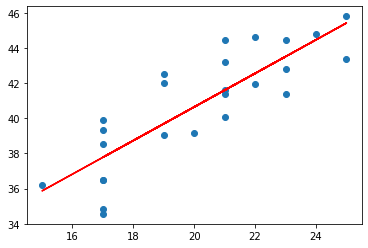

In [123]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_mouse_df["Weight (g)"], avg_mouse_df["Tumor Volume (mm3)"])
print(f"The correlation between factors Mouse weight and Average tumor vol. is {round(correlation[0],2)}")
slope, int, rval, pval, std_err = stats.linregress(avg_mouse_df["Weight (g)"],avg_mouse_df["Tumor Volume (mm3)"])
# Create equation of line to calculate predicted avg tumor volume
r_val = slope * avg_mouse_df["Weight (g)"]+int
line_equ=f'y = {str(round(slope,2))}x + {str(round(int,2))}'
print(f'Linear equation for regression : {line_equ} ')
#plot the linear regression model
plt.scatter(avg_mouse_df["Weight (g)"], avg_mouse_df["Tumor Volume (mm3)"])
plt.plot(avg_mouse_df["Weight (g)"],r_val, "r-")
plt.show()